C:\Users\shrey\AppData\Local\Temp\ipykernel_9504\3743079693.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


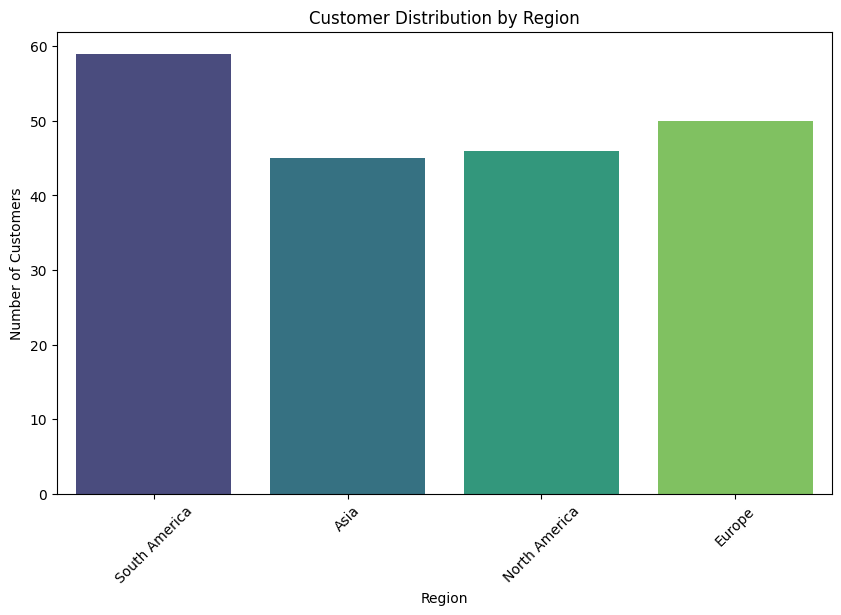

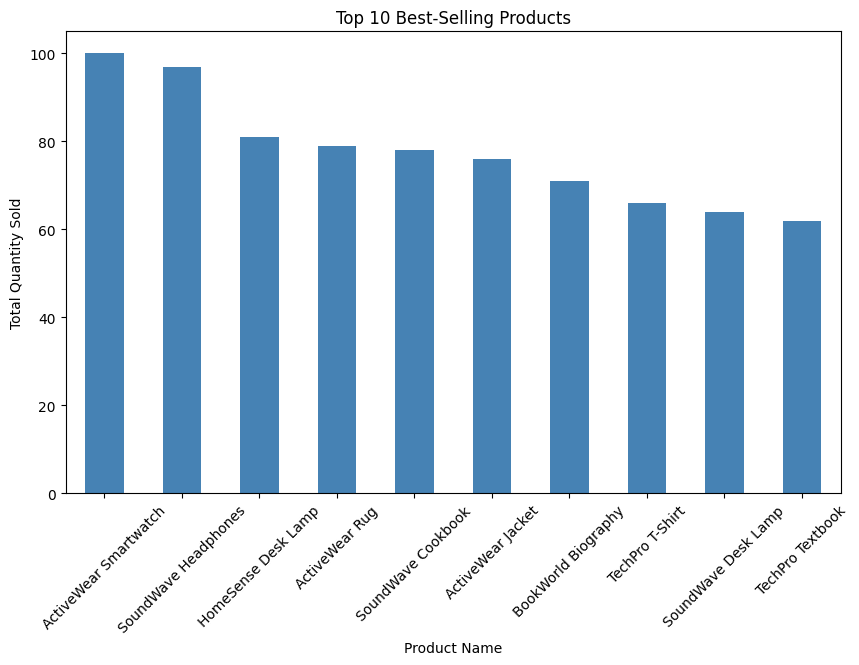

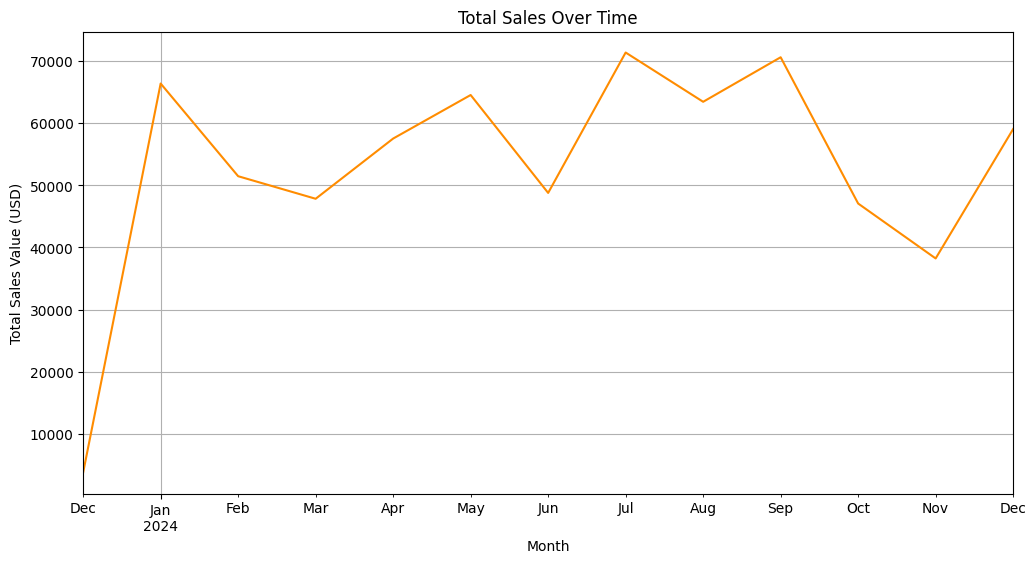

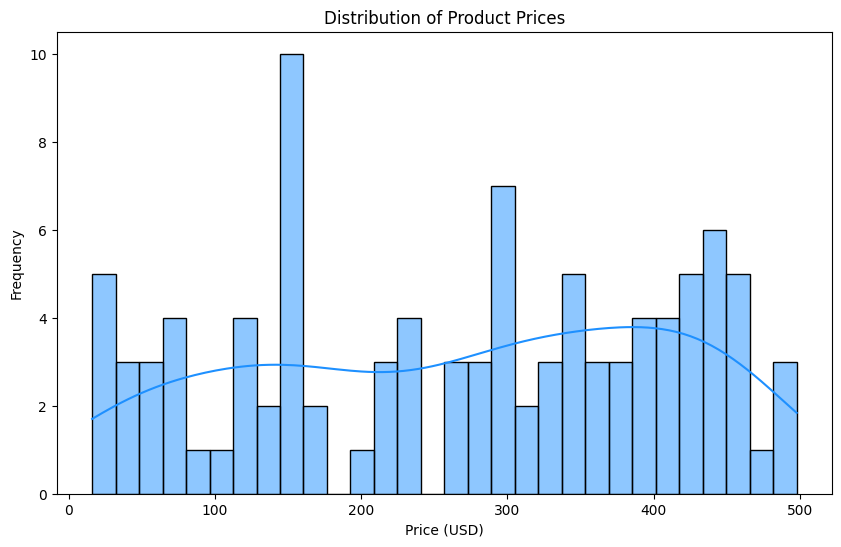

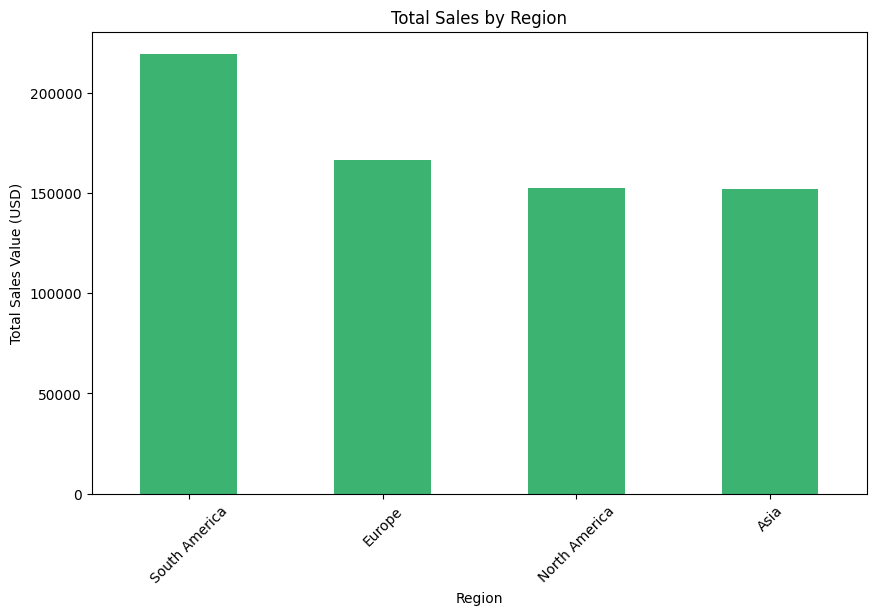

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductNa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic dataset information
def dataset_info():
    print("Customers Dataset:")
    print(customers.info(), "\n")
    print(customers.describe(include='all'), "\n")

    print("Products Dataset:")
    print(products.info(), "\n")
    print(products.describe(include='all'), "\n")

    print("Transactions Dataset:")
    print(transactions.info(), "\n")
    print(transactions.describe(include='all'), "\n")

# Merge datasets for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# 1. Customers by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Products by Quantity Sold
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind="bar", color="steelblue")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# 3. Total Sales Over Time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
sales_trend = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(color="darkorange")
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (USD)")
plt.grid()
plt.show()

# 4. Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(products["Price"], bins=30, kde=True, color="dodgerblue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# 5. Regional Sales Analysis
regional_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
regional_sales.plot(kind="bar", color="mediumseagreen")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Value (USD)")
plt.xticks(rotation=45)
plt.show()

# Summary Insights
def business_insights():
    insights = [
        "1. Most customers are from <region>, indicating a regional concentration of the business.",
        "2. The top-selling products include <product names>, showcasing customer preferences.",
        "3. Sales peaked in <month/year>, suggesting seasonal demand trends.",
        "4. The price range of products is highly variable, with most prices falling between $<low> and $<high>.",
        "5. Region <region> contributed the highest sales value, emphasizing its importance for revenue."
    ]
    for insight in insights:
        print(insight)

# Run dataset information and business insights
if __name__ == "__main__":
    dataset_info()
    business_insights()